# Laboratory 1: Modelling Change with Difference Equations

In [70]:
%display latex # for better cell display

In [40]:
import matplotlib.pyplot as plt

### 1
#### Write the first five terms of the following sequences

##### a) $a_{n+1} = 3a_n, a_0 = 1;$

In [34]:
a0 = 1
a = [a0]
for i in range(5):
    a.append(3 * a[i])
a

[1, 3, 9, 27, 81, 243]

##### b) $a_{n+1} = 3a_n\left(a_n + 1\right), a_0 = 0;$
(0 all the time, maybe wrong equation?)

In [37]:
a0 = 0
a = [a0]
for i in range(5):
    a.append(3 * a[i] * (a[i] + 1))
a

[0, 0, 0, 0, 0, 0]

##### c) $a_{n+1} = 2a_n^2, a_0 = -1;$

In [35]:
a0 = -1;
a = [a0];
for i in range(5):
    a.append(2 * a[i] ^ 2)
a

[-1, 2, 8, 128, 32768, 2147483648]

### 2
#### Write the first ten terms of the sequence satisfying the following difference equations and draw the corresponding graph of the generated dynamical system

Difference equation reminders: <br>
$\Delta a_n = a_{n+1} - a_n$ <br>
$a_{n+1} = \Delta a_n + a_n$

##### a) $\Delta a_n = \frac{1}{3}a_n, a_0 = 1;$

$a_{n+1} = \frac{1}{3}a_n + a_n$ <br>
$a_{n+1} = \frac{4}{3} a_n$

In [86]:
a0 = float(1)
a = [a0]
for i in range(9):
    a.append(4/3 * a[i])
[f"{x:.6f}" for x in a]

['1.000000',
 '1.333333',
 '1.777778',
 '2.370370',
 '3.160494',
 '4.213992',
 '5.618656',
 '7.491541',
 '9.988721',
 '13.318295']

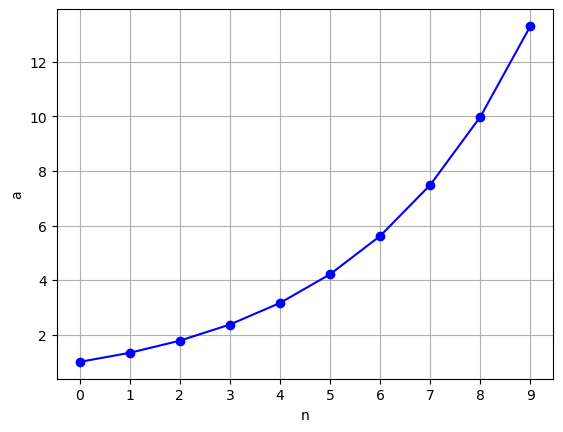

In [87]:
plt.plot(range(10), a, 'bo-')
plt.xlabel("n")
plt.ylabel("a")
plt.grid(True)
plt.xticks(range(10))
plt.show()

##### b) $\Delta a_n = 0.01 \cdot \left(200 - a_n\right), a_0 = 10;$
$a_{n+1} = 0.01 \cdot \left(200 - a_n\right) + a_n$

In [57]:
a0 = float(10)
a = [a0]
for i in range(9):
    a.append(1/100 * (200 - a[i]) + a[i])
[f"{x:.6f}" for x in a]

['10.000000',
 '11.900000',
 '13.781000',
 '15.643190',
 '17.486758',
 '19.311891',
 '21.118772',
 '22.907584',
 '24.678508',
 '26.431723']

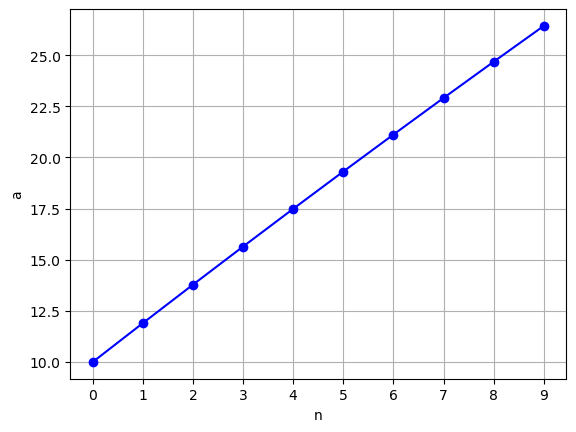

In [58]:
plt.plot(range(10), a, 'bo-')
plt.xlabel("n")
plt.ylabel("a")
plt.grid(True)
plt.xticks(range(10))
plt.show()

##### c) $\Delta a_n = 1.5 \cdot \left(100 - a_n\right), a_0 = 200;$
$a_{n+1} = 1.5 \cdot \left(100 - a_n\right) + a_n$

In [92]:
a0 = float(200)
a = [a0]
for i in range(9):
    a.append(3/2 * (100 - a[i]) + a[i])
[f"{x:.6f}" for x in a]

['200.000000',
 '50.000000',
 '125.000000',
 '87.500000',
 '106.250000',
 '96.875000',
 '101.562500',
 '99.218750',
 '100.390625',
 '99.804688']

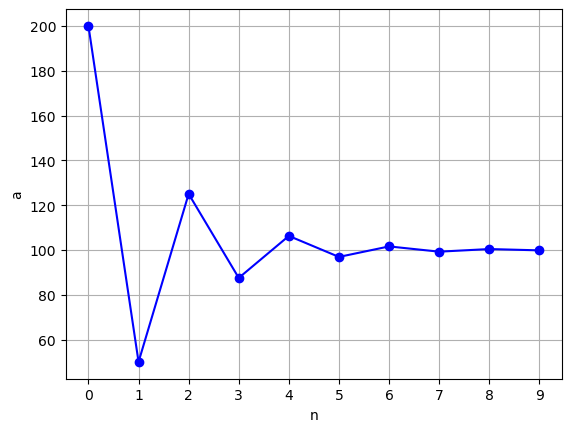

In [93]:
plt.plot(range(10), a, 'bo-')
plt.xlabel("n")
plt.ylabel("a")
plt.grid(True)
plt.xticks(range(10))
plt.show()

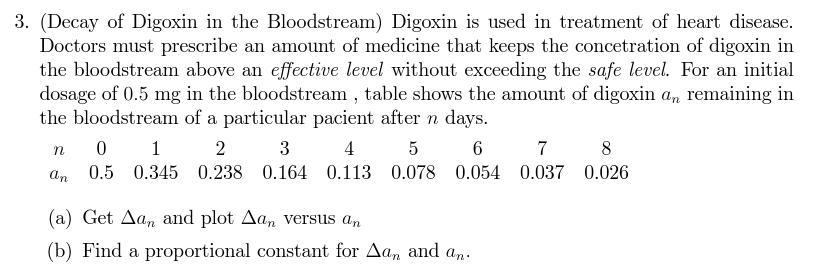

In [59]:
a = [0.5, 0.345, 0.238, 0.164, 0.113, 0.078, 0.054, 0.037, 0.026]
delta_a = []
for i in range(8):
    delta_a.append(a[i+1] - a[i])
[f"{x:.3f}" for x in delta_a]

['-0.155',
 '-0.107',
 '-0.074',
 '-0.051',
 '-0.035',
 '-0.024',
 '-0.017',
 '-0.011']

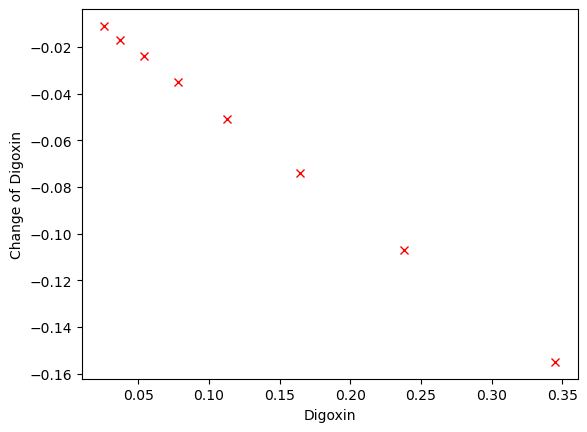

In [60]:
plt.plot(a[1:9], delta_a, 'rx');
plt.xlabel("Digoxin")
plt.ylabel("Change of Digoxin")
plt.show()

In [61]:
k = (delta_a[5] - delta_a[4]) / (a[5] - a[4])
k

-0.314285714285714

In [62]:
a_est = [a[0]]
for i in range(8):
    a_est.append(a_est[i] * (1 + k))

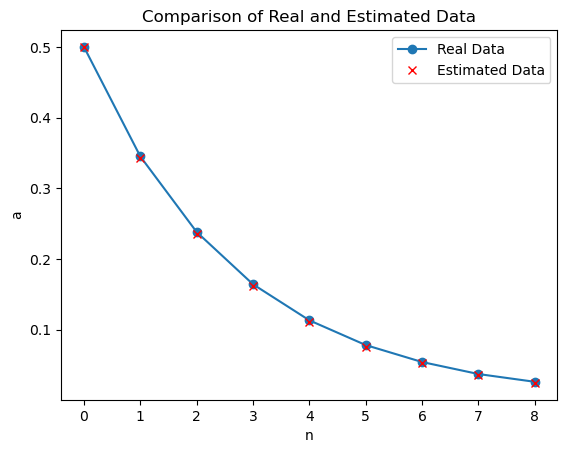

In [63]:
real_data = [[n, a[n]] for n in range(9)]
est_data = [[n, a_est[n]] for n in range(9)]

real_x, real_y = zip(*real_data)
est_x, est_y = zip(*est_data)

plt.plot(real_x, real_y, 'o-', label='Real Data')
plt.plot(est_x, est_y, 'rx', label='Estimated Data')

plt.xlabel('n')
plt.ylabel('a')
plt.title('Comparison of Real and Estimated Data')
plt.legend(['Real Data', 'Estimated Data'])

plt.show()

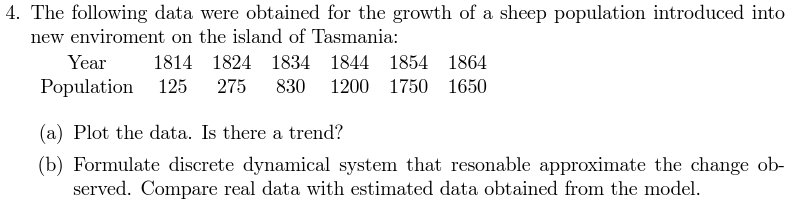

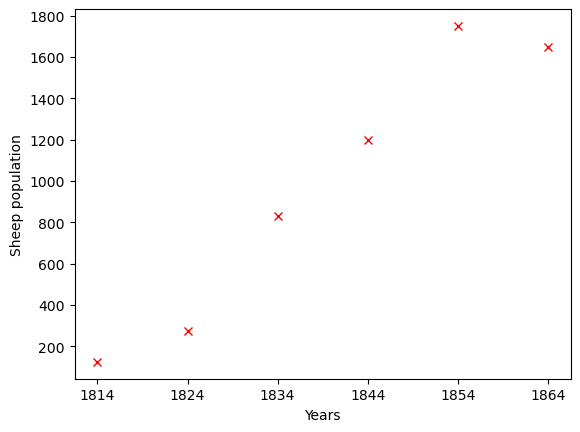

In [64]:
years = [1814, 1824, 1834, 1844, 1854, 1864]
populations = [125, 275, 830, 1200, 1750, 1650]
plt.plot(years, populations, 'rx')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Sheep population')
plt.show()

### ❗ Trend: there seems to be a dependency between the years and sheep populations, with a 1750 population carrying capacity

In [82]:
delta_p = []
for i in range(5):
    delta_p.append(populations[i+1] - populations[i])
delta_p

[150, 555, 370, 550, -100]

In [92]:
k = (delta_p[4] - delta_p[3]) / (populations[4] - populations[3])
k

-13/11

In [93]:
delta_p = []
for i in range(5):
    delta_p.append(populations[i+1] - populations[i])

print(populations)
print(delta_p)

p_est = [populations[0]]
for i in range(5):
    p_est.append((1 + k) * p_est[i])

[125, 275, 830, 1200, 1750, 1650]
[150, 555, 370, 550, -100]


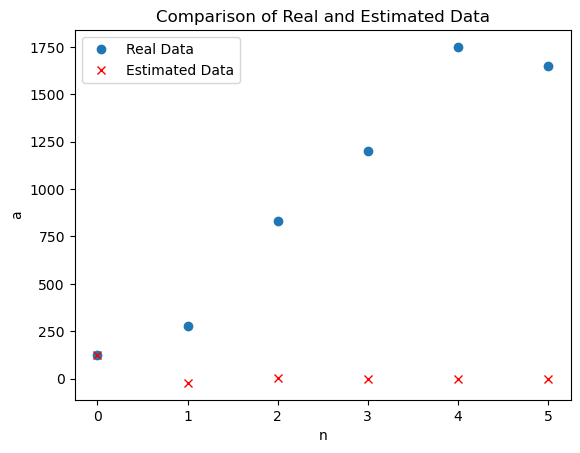

In [94]:
real_data = [[n, populations[n]] for n in range(6)]
est_data = [[n, p_est[n]] for n in range(6)]

real_x, real_y = zip(*real_data)
est_x, est_y = zip(*est_data)

plt.plot(real_x, real_y, 'o', label='Real Data')
plt.plot(est_x, est_y, 'rx', label='Estimated Data')

plt.xlabel('n')
plt.ylabel('a')
plt.title('Comparison of Real and Estimated Data')
plt.legend(['Real Data', 'Estimated Data'])

plt.show()

$\Delta p_n = k(1750 - p_n)p_n$

In [88]:
k = (delta_p[4] - delta_p[3]) / (
    ((1750 - populations[4]) * populations[4]) - 
    ((1750 - populations[3]) * populations[3])
)
k

13/13200

#### Seems to be no dependency between populations and change of populations

In [89]:
delta_p = []
for i in range(5):
    delta_p.append(populations[i+1] - populations[i])

print(populations)
print(delta_p)

p_est = [populations[0]]
for i in range(5):
    p_est.append(p_est[i] + k * (1750 - p_est[i]) * p_est[i])


[125, 275, 830, 1200, 1750, 1650]
[150, 555, 370, 550, -100]


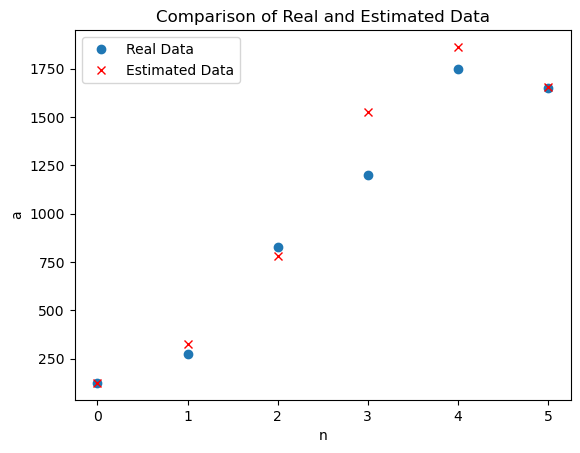

In [90]:
real_data = [[n, populations[n]] for n in range(6)]
est_data = [[n, p_est[n]] for n in range(6)]

real_x, real_y = zip(*real_data)
est_x, est_y = zip(*est_data)

plt.plot(real_x, real_y, 'o', label='Real Data')
plt.plot(est_x, est_y, 'rx', label='Estimated Data')

plt.xlabel('n')
plt.ylabel('a')
plt.title('Comparison of Real and Estimated Data')
plt.legend(['Real Data', 'Estimated Data'])

plt.show()